# Pymaceuticals Inc.
---

### Analysis

The data shows that there is a relatively equal amount of male and female mice (51% male and 49% male) . When we look at the number of mice tested, Capomulin and Ramicane had the most nice tested. Ramicane looks to be the most effective of trating tumors since they have the lowest mean of 40.216745 and a std of 4.994774. Since the STD is relative low, we can expect that most of the results (tumor size) is very conistent to the mean data. Capomulin has the second lowest mean at 40.657541, var of 24.947764 and  std of 4.995774. Ketapril seemed to be the least effective with a mean of 5.235638, they also tested the third highest number of mice. 

Of the drug regimens that we narrowed down (Capomulin,Ramicane,Infubinol and Ceftamin) Infubinol is the only one with an outlier. Based on the data, I am unable to determine if this would happen again in the future, or why this was the case.

There is a positive correlation between mouse weight and tumor size in regards to the Capomulin drug regimen. The correlation is 0.84. Meaning the more the mouse weights the larger amount of tumors. Additionally the longer time point fewer amount of tumors, showibng that as time goes on, Capomulin is effective in decreasing tumors.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
study_merged = pd.merge(study_results,mouse_metadata,how = 'left', on ="Mouse ID")

# Display the data table for preview
study_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = study_merged['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_merged.loc[study_merged.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = study_merged.loc[study_merged["Mouse ID"] == "g989", :]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.i hope 
cleaned= study_merged[study_merged['Mouse ID'].isin(duplicate)==False]
cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# # Checking the number of mice in the clean DataFrame.
clean_mice=cleaned["Mouse ID"].nunique()
clean_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({'Mean Tumor Volume': mean,
                               'Median Tumor Volume': median,
                               'Tumor Volume Variance': var,
                               'Tumor Volume Std. Dev.': std,})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = cleaned.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

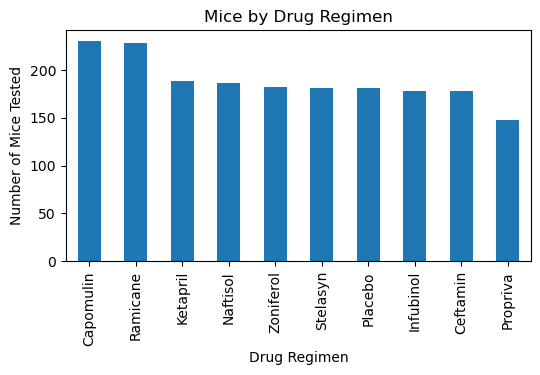

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count = cleaned['Drug Regimen'].value_counts()
drug_pandas = mouse_count.plot(kind='bar', figsize=(6,3),title='Mice by Drug Regimen',xlabel='Drug Regimen',ylabel='Number of Mice Tested')
plt.show()
plt.tight_layout()

Text(0.5, 0, 'Mice by Drug Regimen')

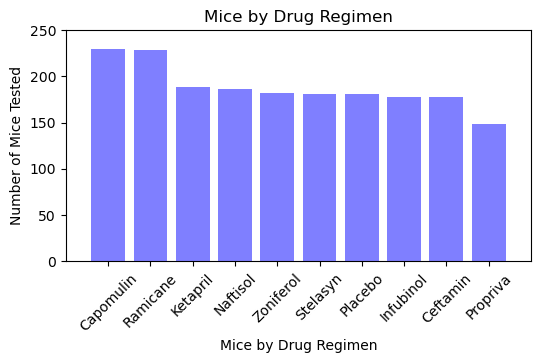

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_count))
y_axis= mouse_count 

drug_reg= list(mouse_count.index.values)
tick_locations = [x for x in x_axis]
plt.figure(figsize = (6,3))
plt.bar(x_axis,y_axis,color='blue',alpha=0.5, align='center')
plt.xticks(tick_locations,drug_reg, rotation=45)
plt.xlim(-1,len(x_axis))
plt.ylim(0,250)
plt.title('Mice by Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xlabel('Mice by Drug Regimen')

Text(0, 0.5, 'Sex')

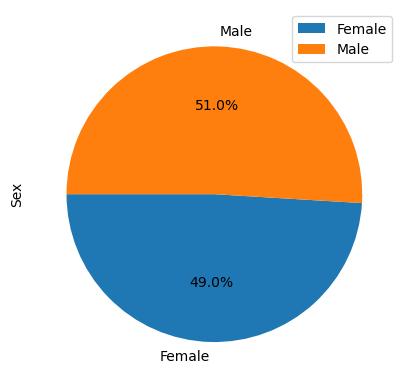

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = cleaned.groupby(['Sex']).count()
sex_pie = mouse_gender.plot(kind='pie',y='Mouse ID',autopct='%1.1f%%',startangle= 180)
sex_pie.set_ylabel('Sex')

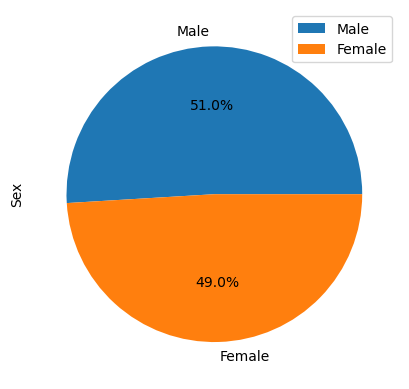

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_count = cleaned['Sex'].value_counts()
labels= list(mice_sex_count.index)
plt.pie(mice_sex_count,labels=labels,autopct='%1.1f%%')
plt.legend(labels,loc='upper right')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= cleaned.groupby(['Mouse ID'])['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_df = pd.merge(max_timepoint,cleaned,on =(['Mouse ID','Timepoint']))
max_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:

# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    drug = max_df.loc[max_df['Drug Regimen']==treatment]
    tumor_vol = drug['Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol)

    # add subset 
    # Determine outliers using upper and lower bounds
    quartiles=tumor_vol.quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr= upper_q-lower_q
    lower_bound = lower_q -(1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outliers = tumor_vol[(tumor_vol>upper_bound)|(tumor_vol<lower_bound)]
    print(f'{treatment} potential outliers: {outliers}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


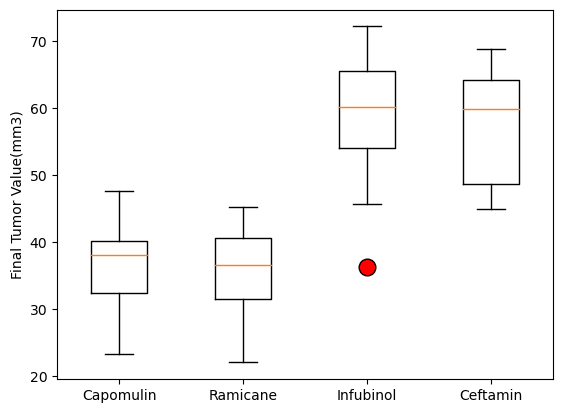

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker= dict(marker='o', markerfacecolor='r',linestyle ='none',markersize=12)
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list,labels=treatments,flierprops=marker)
ax1.set_ylabel('Final Tumor Value(mm3)')
plt.show()

## Line and Scatter Plots

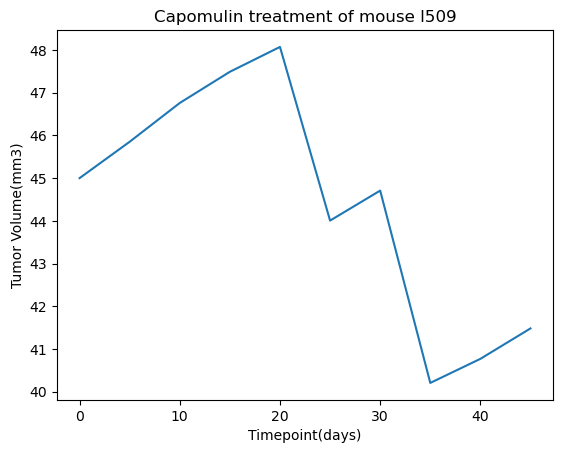

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#find capomulin df 
#find mouse 1509 df 
capomulin= cleaned.loc[cleaned['Drug Regimen']=='Capomulin',:]
mouse = capomulin.loc[capomulin['Mouse ID']=='l509',:]

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

C:\Users\memel\AppData\Local\Temp\ipykernel_40796\1774904881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouping = capomulin.groupby(['Mouse ID']).mean()


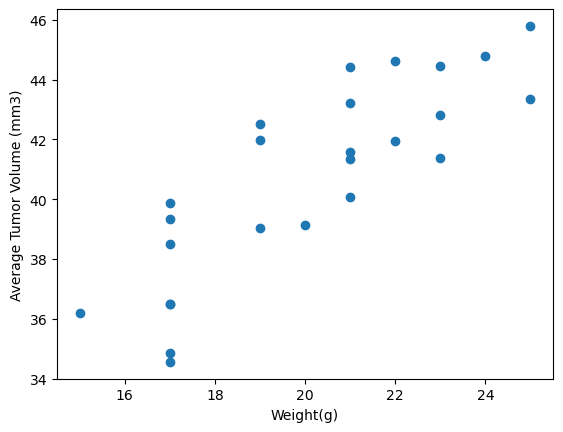

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouping = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(grouping['Weight (g)'],grouping['Tumor Volume (mm3)'])
plt.xlabel("Weight(g)")
plt.ylabel('Average Tumor Volume (mm3)')
           
plt.show()

## Correlation and Regression

The correltion between mouse weight and average tumor volume is 0.84


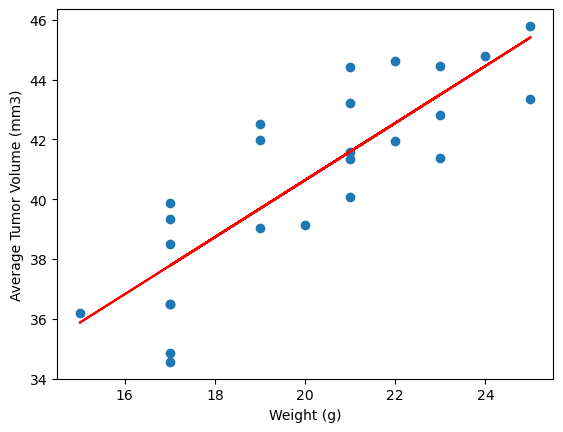

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis=grouping['Weight (g)']
y_axis=grouping['Tumor Volume (mm3)']
print(f'The correltion between mouse weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
# plt.annotate(line_eq,(22,40),fontsize=15,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()